# Libraries import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

# Task 1

## Data Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Datasets/neural_network_data.csv')
df

,x1_input,x2_input,f_values_target
0,-10.000000,-10.0,787.877677
1,-9.899497,-10.0,818.057683
2,-9.798995,-10.0,797.264954
3,-9.698492,-10.0,737.471130
4,-9.597990,-10.0,751.237866
...,...,...,...
39995,9.597990,10.0,681.274832
39996,9.698492,10.0,750.358553
39997,9.798995,10.0,747.898181
39998,9.899497,10.0,753.235027


In [ ]:
df.describe()

,x1_input,x2_input,f_values_target
count,4.000000e+04,4.000000e+04,40000.000000
mean,6.167511e-16,9.094947e-16,265.109132
std,5.802515e+00,5.802515e+00,174.266079
min,-1.000000e+01,-1.000000e+01,0.000013
25%,-5.000000e+00,-5.000000e+00,121.769028
50%,8.881784e-16,8.881784e-16,243.996187
75%,5.000000e+00,5.000000e+00,386.342274
max,1.000000e+01,1.000000e+01,932.130754


In [ ]:
# Extract features and targets
x = df[['x1_input', 'x2_input']].values
y = df['f_values_target'].values.reshape(-1, 1)

### Data scaling

x1_input and x2_input were in range -10;10 and f_values_target in ~(0;932)

In [ ]:
# Scale features (Standard Scaling)
'''x_mean = np.mean(x, axis=0)
x_std = np.std(x, axis=0)
x_scaled = (x - x_mean) / x_std'''

'x_mean = np.mean(x, axis=0)\nx_std = np.std(x, axis=0)\nx_scaled = (x - x_mean) / x_std'

In [ ]:
# Scale targets (Min-Max Scaling)
#y_min = np.min(y)
#y_max = np.max(y)
#y_scaled = (y - y_min) / (y_max - y_min)

In [ ]:
"""y_min = np.min(y)
y_max = np.max(y)
a = -10
b = 10
y_scaled = a + ((y - y_min) * (b - a)) / (y_max - y_min)"""

'y_min = np.min(y)\ny_max = np.max(y)\na = -10\nb = 10\ny_scaled = a + ((y - y_min) * (b - a)) / (y_max - y_min)'

In [ ]:
#df['x1_input_scaled'] = x_scaled[:, 0]  # Adding scaled x1_input
#df['x2_input_scaled'] = x_scaled[:, 1]  # Adding scaled x2_input
#df['f_values_target_scaled'] = y_scaled  # Adding scaled f_values_target

### Plotting

In [ ]:
def plot_diff (feat):
  plt.figure(figsize=(15, 8))

  # Histogram
  plt.subplot(2, 1, 1)
  sns.histplot(df[feat], kde=True)
  plt.title('Histogram')

  # Boxplot
  plt.subplot(2, 1, 2)
  sns.boxplot(x=df[feat])
  plt.title('Boxplot')

  plt.tight_layout()
  plt.show

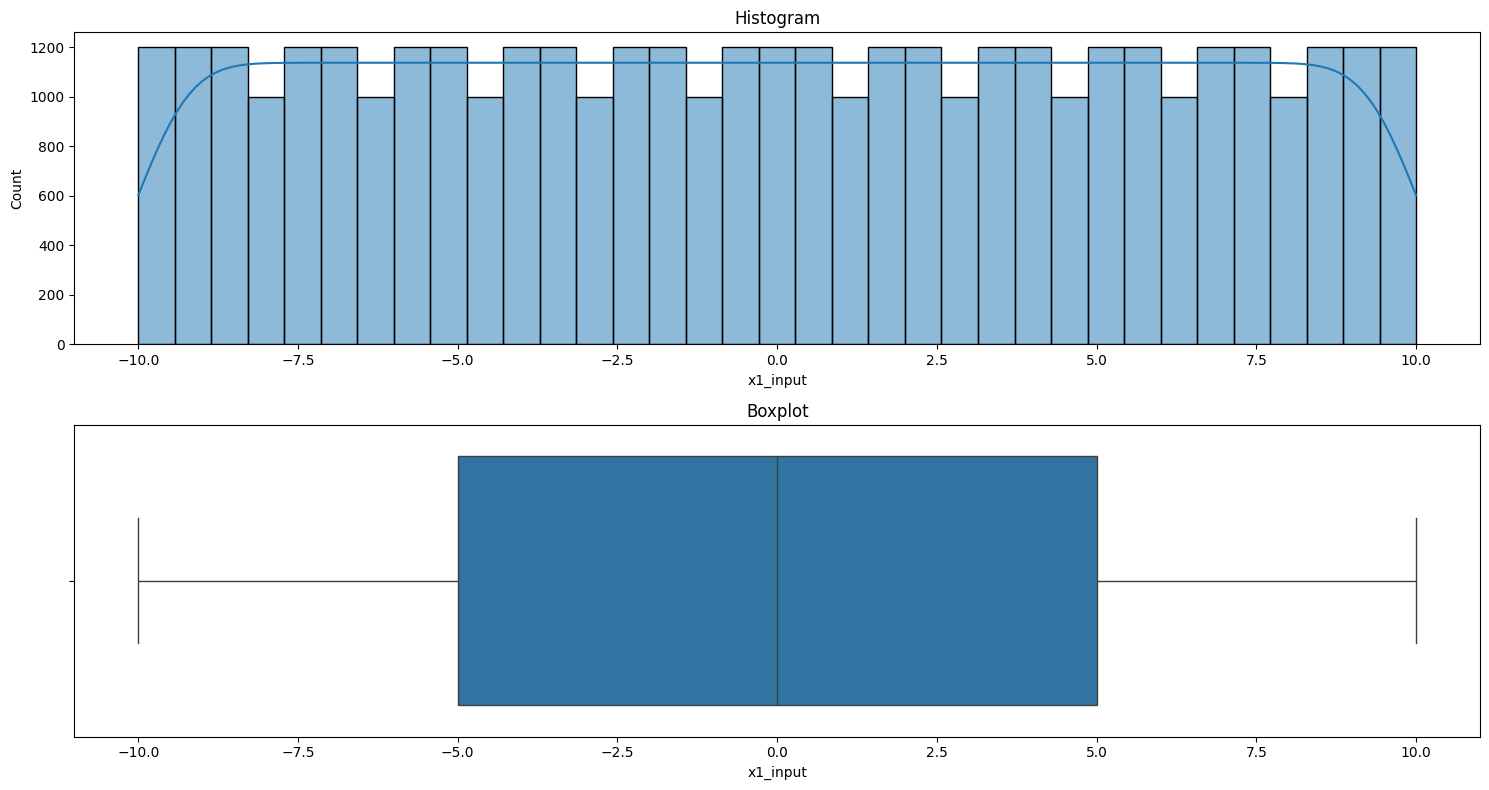

In [ ]:
plot_diff('x1_input')

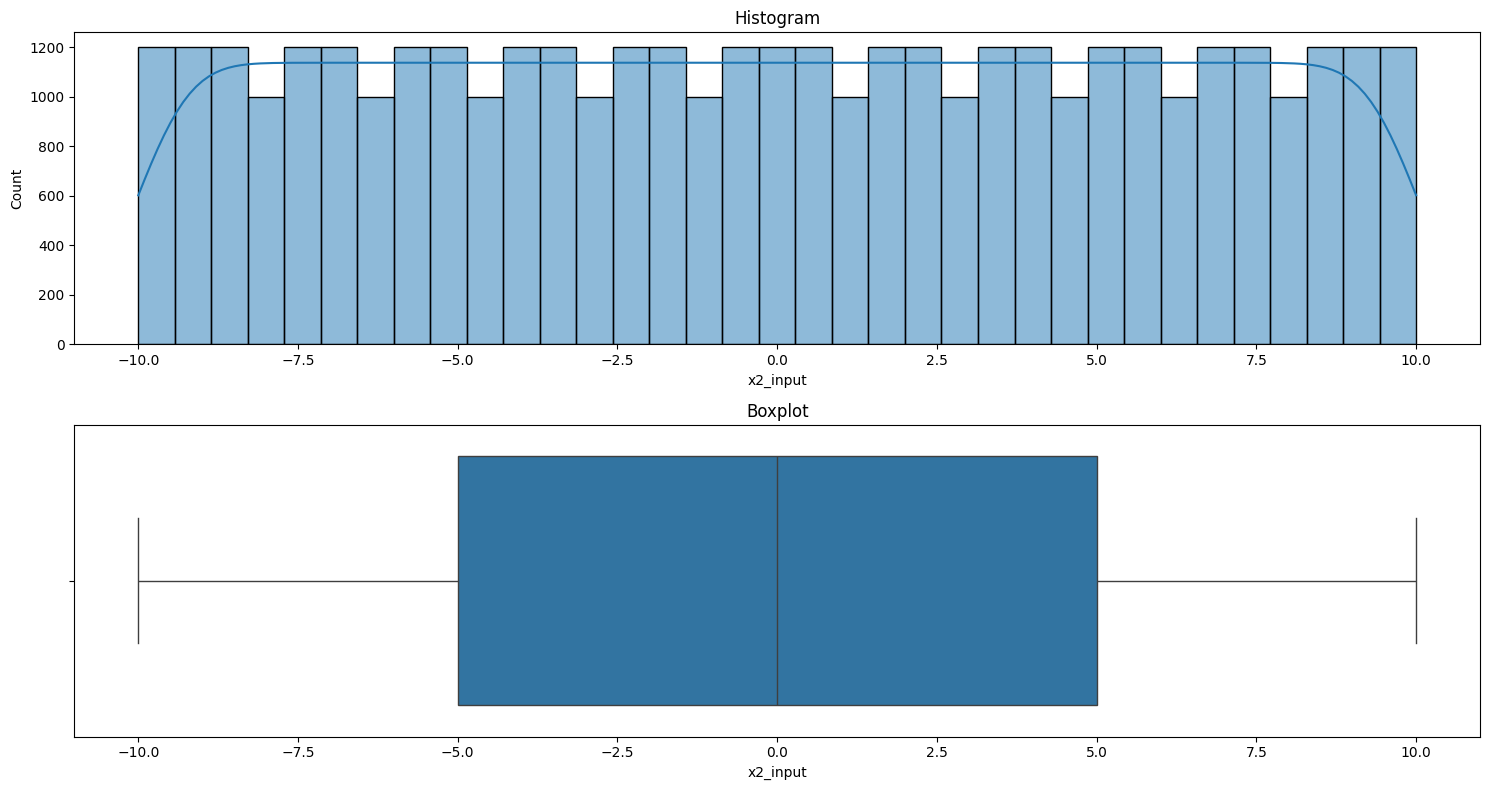

In [ ]:
plot_diff('x2_input')

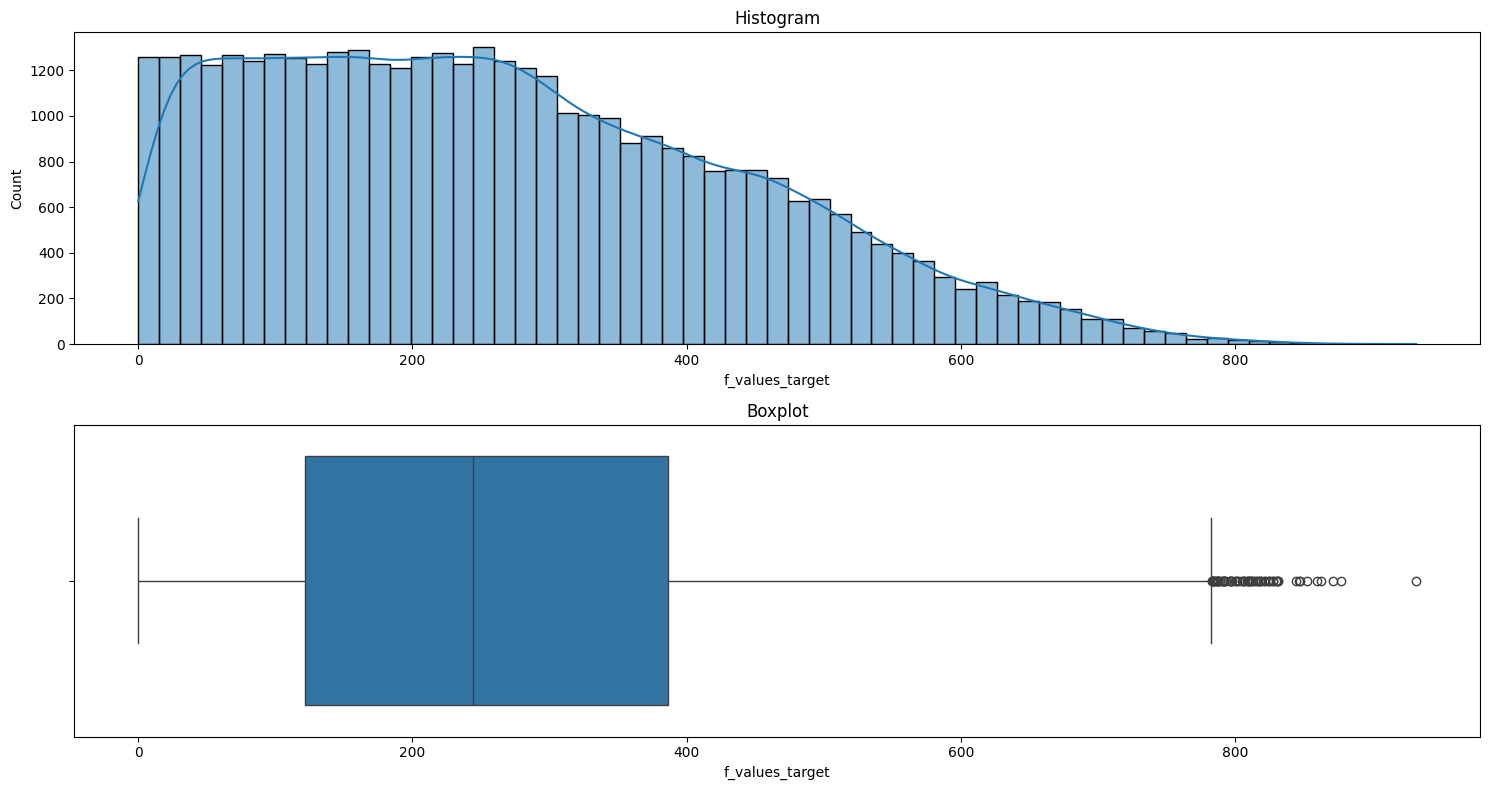

In [ ]:
plot_diff('f_values_target')

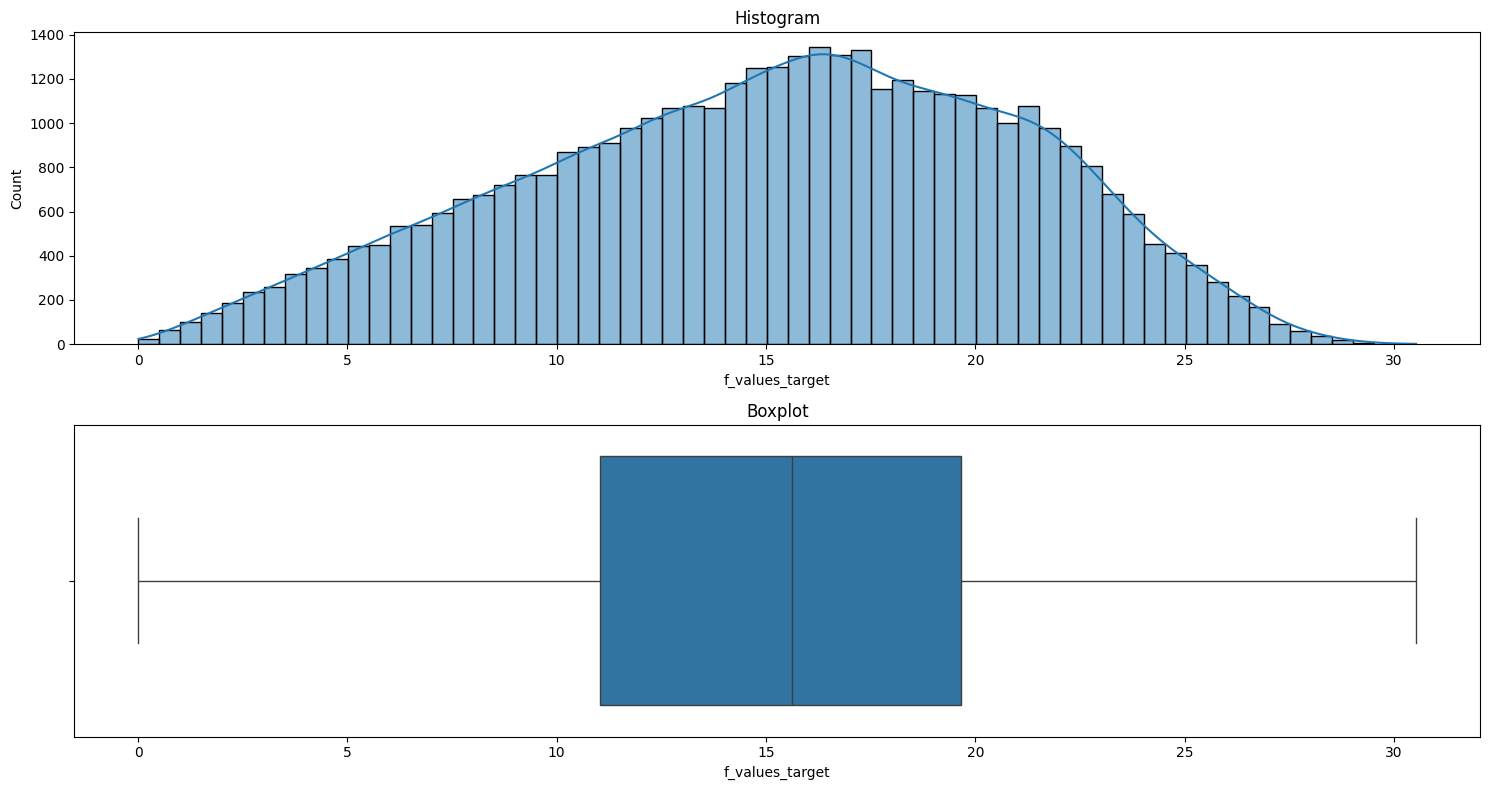

In [ ]:
plt.figure(figsize=(15, 8))

# Histogram
plt.subplot(2, 1, 1)
sns.histplot(np.sqrt(df['f_values_target']), kde=True)
plt.title('Histogram')

# Boxplot
plt.subplot(2, 1, 2)
sns.boxplot(x=np.sqrt(df['f_values_target']))
plt.title('Boxplot')
plt.tight_layout()
plt.show()

In [ ]:
df['f_values_target_sqrt'] = np.sqrt(df['f_values_target'])

### Binning

In [ ]:
num_bins = 10
df_bin = df.copy()
# Create bins
df_bin['f_values_bin'] = pd.cut(df['f_values_target'], bins=num_bins, labels=False)

# Add 1 to make bins start from 1 instead of 0 for better readability
df_bin['f_values_bin'] = df_bin['f_values_bin'] + 1

In [ ]:
df_bin

,x1_input,x2_input,f_values_target,f_values_target_sqrt,f_values_bin
0,-10.000000,-10.0,787.877677,28.069159,9
1,-9.899497,-10.0,818.057683,28.601708,9
2,-9.798995,-10.0,797.264954,28.235881,9
3,-9.698492,-10.0,737.471130,27.156420,8
4,-9.597990,-10.0,751.237866,27.408719,9
...,...,...,...,...,...
39995,9.597990,10.0,681.274832,26.101242,8
39996,9.698492,10.0,750.358553,27.392673,9
39997,9.798995,10.0,747.898181,27.347727,9
39998,9.899497,10.0,753.235027,27.445128,9


In [ ]:
df_bin['f_values_bin'].value_counts()

2     7675
1     7639
3     7638
4     6240
5     4883
6     3392
7     1665
8      716
9      143
10       9
Name: f_values_bin, dtype: int64

## Modeling

In [ ]:
X = df[['x1_input', 'x2_input']].T.values  # Shape (2, m)
#Y = df[['f_values_target']].T.values  # Shape (1, m)
Y = df[['f_values_target_sqrt']].T.values

In [ ]:
def initialize_parameters_he(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * np.sqrt(2. / n_x)
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * np.sqrt(2. / n_h)
    b2 = np.zeros((n_y, 1))

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

In [ ]:
def relu(Z):
    return np.maximum(0, Z)

def sigmoid(Z):
    Z = np.clip(Z, -500, 500)  # Prevent overflow
    return 1 / (1 + np.exp(-Z))

def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    L_i = np.dot(W1, X) + b1
    L1 = relu(L_i)
    L_o = np.dot(W2, L1) + b2
    L2 = L_o  # Linear activation for regression

    cache = {"L": L_i, "L1": L1, "L_o": L_o, "L2": L2}
    return L2, cache

In [ ]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]

    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['L1']
    A2 = cache['L2']

    # Output layer gradients
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    # Hidden layer gradients
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.array(dA1, copy=True)  # Just copying dA1
    dZ1[A1 <= 0] = 0  # Derivative of ReLU
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

    return gradients

In [ ]:
def update_parameters(parameters, grads, learning_rate = 0.01):
    W1 = parameters['W1'] - learning_rate * grads['dW1']
    b1 = parameters['b1'] - learning_rate * grads['db1']
    W2 = parameters['W2'] - learning_rate * grads['dW2']
    b2 = parameters['b2'] - learning_rate * grads['db2']

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

In [ ]:
def mse_cost(L2, Y):
    m = Y.shape[1]
    cost = (1/m) * np.sum((L2 - Y)**2)
    return cost

In [ ]:
def compute_rmse1(L2, Y):
    m = Y.shape[1]  # Number of examples
    rmse = np.sqrt(np.mean((L2 - Y) ** 2))
    return rmse

In [ ]:
def compute_rmse(Y_hat, Y):
    m = Y.shape[1]  # number of examples
    loss = np.linalg.norm(Y_hat - Y, 'fro') ** 2 / m
    return loss

In [ ]:
def update_learning_rate(epoch, initial_lr, decay_rate):
    new_lr = initial_lr / (1 + decay_rate * epoch)
    return new_lr

In [ ]:
def split_data(X, Y, train_size=0.8):
    """
    Splits the dataset into training and testing sets.

    Parameters:
    - X: numpy array of features, shape (number of features, number of examples)
    - Y: numpy array of labels, shape (1, number of examples)
    - train_size: proportion of the dataset to include in the train split

    Returns:
    - X_train: features for the training set
    - X_test: features for the test set
    - Y_train: labels for the training set
    - Y_test: labels for the test set
    """

    m = X.shape[1]  # Total number of examples
    permutation = np.random.permutation(m)
    X_shuffled = X[:, permutation]
    Y_shuffled = Y[:, permutation]

    train_end = int(m * train_size)

    X_train = X_shuffled[:, :train_end]
    Y_train = Y_shuffled[:, :train_end]
    X_test = X_shuffled[:, train_end:]
    Y_test = Y_shuffled[:, train_end:]

    return X_train, X_test, Y_train, Y_test

In [ ]:
X_train, X_test, Y_train, Y_test = split_data(X, Y, train_size=0.8)

In [ ]:
#X_train, X_test, Y_train, Y_test = split_data(X_scaled, Y_scaled, train_size=0.8)

In [ ]:
def create_mini_batches(X, Y, mini_batch_size):
    m = X.shape[1]  # number of training examples
    mini_batches = []

    # Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1, m))

    # Partition (shuffled_X, shuffled_Y), minus the end case
    num_complete_minibatches = m // mini_batch_size
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : (k + 1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : (k + 1) * mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size :]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size :]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches


In [ ]:
def train_model(X_train, Y_train, n_h, num_iterations=10000, learning_rate=0.00001, mini_batch_size=64):
    n_x = X_train.shape[0]
    n_y = Y_train.shape[0]
    parameters = initialize_parameters_he(n_x, n_h, n_y)

    for i in range(num_iterations):
        mini_batches = create_mini_batches(X_train, Y_train, mini_batch_size)

        for mini_batch in mini_batches:
            (mini_batch_X, mini_batch_Y) = mini_batch

            # Forward propagation
            L2, cache = forward_propagation(mini_batch_X, parameters)

            # Compute loss
            rmse = compute_rmse(L2, mini_batch_Y)

            # Backward propagation
            gradients = backward_propagation(parameters, cache, mini_batch_X, mini_batch_Y)

            # Update parameters
            parameters["W1"] -= learning_rate * gradients["dW1"]
            parameters["b1"] -= learning_rate * gradients["db1"]
            parameters["W2"] -= learning_rate * gradients["dW2"]
            parameters["b2"] -= learning_rate * gradients["db2"]

        if i % 100 == 0:
            print(f"Iteration {i}: RMSE = {rmse}")

    return parameters

In [ ]:
def test_model(X_test, Y_test, parameters):
    # Forward propagation
    L2, _ = forward_propagation(X_test, parameters)

    # Compute loss
    loss = mse_cost(L2, Y_test)
    print(f"Test loss: {loss}")

In [ ]:
parameters = train_model(X_train, Y_train, 1)

Iteration 0: RMSE = 207.83521205960142
Iteration 100: RMSE = 73.85431706161627
Iteration 200: RMSE = 56.95516780781425
Iteration 300: RMSE = 48.245226105404875
Iteration 400: RMSE = 32.37726635247505
Iteration 500: RMSE = 32.37332363847554
Iteration 600: RMSE = 33.780797036931006
Iteration 700: RMSE = 28.47261521644955
Iteration 800: RMSE = 34.674410397524774
Iteration 900: RMSE = 17.328218635518052
Iteration 1000: RMSE = 21.640442551621337
Iteration 1100: RMSE = 22.513761170648166
Iteration 1200: RMSE = 34.58183842999841
Iteration 1300: RMSE = 24.435475135531288
Iteration 1400: RMSE = 28.27424580683578
Iteration 1500: RMSE = 25.168227778703926
Iteration 1600: RMSE = 37.16317635795777
Iteration 1700: RMSE = 20.350774046467272
Iteration 1800: RMSE = 20.98393075911957
Iteration 1900: RMSE = 22.52500404775871
Iteration 2000: RMSE = 22.380154508016403
Iteration 2100: RMSE = 25.192220188013785
Iteration 2200: RMSE = 18.69721311144396
Iteration 2300: RMSE = 24.006764257141707
Iteration 2400:

In [ ]:
test_model(X_test, Y_test, parameters)

Test loss: 24.83234160280176


In [ ]:
L2,_ =  forward_propagation(X, parameters)

In [ ]:
L2

array([[23.80770313, 23.61606037, 23.42441762, ..., 13.59534672,
        13.59534672, 13.59534672]])

In [ ]:
Y_pred = L2.reshape(-1, 1)

# Ensure Y_pred has the same number of rows as df
if len(df) == len(Y_pred):
    df['Y_pred'] = Y_pred
else:
    print("Mismatch in the number of rows. Cannot add Y_pred to df.")
df

,x1_input,x2_input,f_values_target,f_values_target_sqrt,Y_pred
0,-10.000000,-10.0,787.877677,28.069159,23.807703
1,-9.899497,-10.0,818.057683,28.601708,23.616060
2,-9.798995,-10.0,797.264954,28.235881,23.424418
3,-9.698492,-10.0,737.471130,27.156420,23.232775
4,-9.597990,-10.0,751.237866,27.408719,23.041132
...,...,...,...,...,...
39995,9.597990,10.0,681.274832,26.101242,13.595347
39996,9.698492,10.0,750.358553,27.392673,13.595347
39997,9.798995,10.0,747.898181,27.347727,13.595347
39998,9.899497,10.0,753.235027,27.445128,13.595347


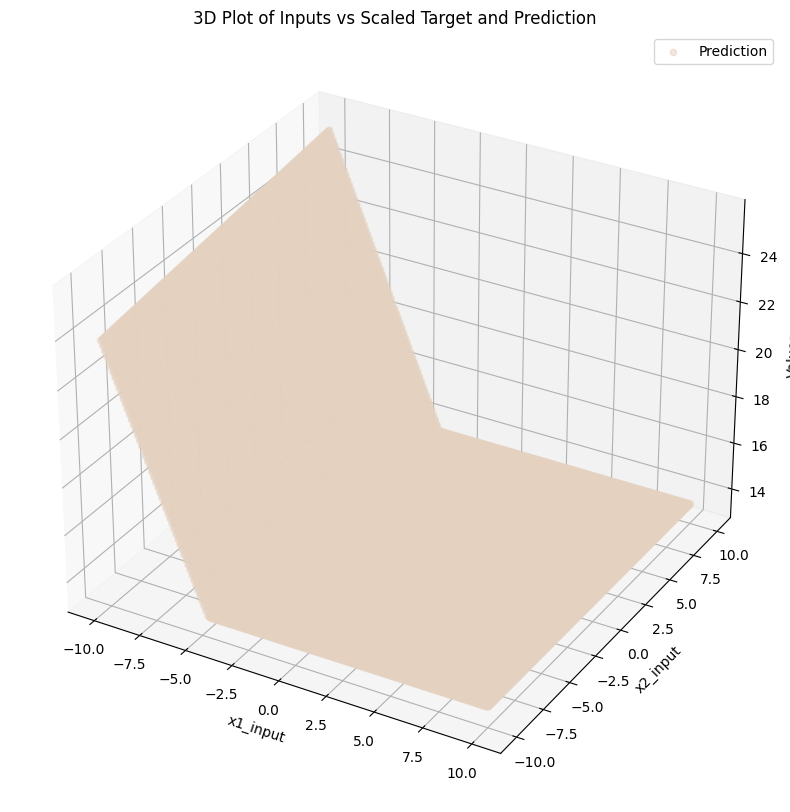

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming df is your DataFrame and it already includes 'Y_pred' as a column

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Nude color tones
target_color = '#f5c3c2'  # Light pinkish nude color
pred_color = '#e4d1c0'   # Light peachy nude color

# Scatter plot for the targets
#ax.scatter(df['x1_input'], df['x2_input'], df['f_values_target'], color=target_color, label='Scaled Target', alpha=0.5)

# Scatter plot for the predictions
ax.scatter(df['x1_input'], df['x2_input'], df['Y_pred'], color=pred_color, label='Prediction', alpha=0.5)

ax.set_title('3D Plot of Inputs vs Scaled Target and Prediction')
ax.set_xlabel('x1_input')
ax.set_ylabel('x2_input')
ax.set_zlabel('Values')
ax.legend()
plt.show()


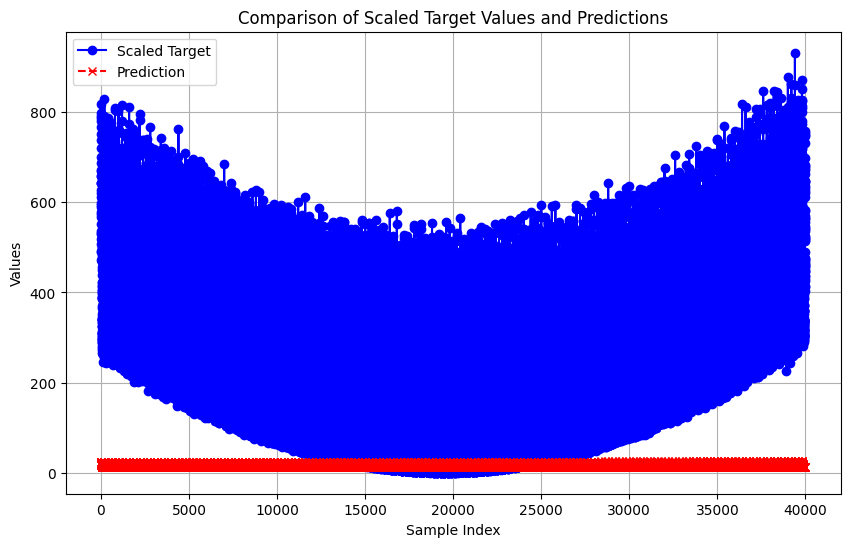

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['f_values_target'], label='Scaled Target', marker='o', linestyle='-', color='blue')
plt.plot(df['Y_pred'], label='Prediction', marker='x', linestyle='--', color='red')
plt.title('Comparison of Scaled Target Values and Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Task 2

In [ ]:
df

,x1_input,x2_input,f_values_target,Y_pred
0,-10.000000,-10.0,787.877677,729.374974
1,-9.899497,-10.0,818.057683,722.653664
2,-9.798995,-10.0,797.264954,715.932354
3,-9.698492,-10.0,737.471130,709.211044
4,-9.597990,-10.0,751.237866,702.489734
...,...,...,...,...
39995,9.597990,10.0,681.274832,683.399468
39996,9.698492,10.0,750.358553,689.769869
39997,9.798995,10.0,747.898181,696.140271
39998,9.899497,10.0,753.235027,702.510672


# Best approach

In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, reg_lambda=1):
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / (input_size + hidden_size))
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / (hidden_size + output_size))
        self.b2 = np.zeros((1, output_size))
        self.learning_rate = learning_rate
        self.reg_lambda = reg_lambda

    def forward_pass(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = np.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        return self.z2

    def compute_loss(self, y_pred, y_true):
        n = y_true.shape[0]
        mse_loss = np.mean((y_pred - y_true) ** 2)
        l2_loss = (self.reg_lambda / 2) * (np.sum(np.square(self.W1)) + np.sum(np.square(self.W2)))
        return mse_loss + l2_loss

    def backpropagation(self, X, y_true, y_pred):
        n = y_true.shape[0]
        output_error = y_pred - y_true
        dW2 = (np.dot(self.a1.T, output_error) + self.reg_lambda * self.W2) / n
        db2 = np.sum(output_error, axis=0, keepdims=True) / n
        dhidden_error = np.dot(output_error, self.W2.T) * self.relu_derivative(self.z1)
        dW1 = (np.dot(X.T, dhidden_error) + self.reg_lambda * self.W1) / n
        db1 = np.sum(dhidden_error, axis=0, keepdims=True) / n

        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def fit(self, X, y, epochs=1000):
        for epoch in range(epochs):
            #for i in range(X.shape[0]):  # Iterate over each example
            #    X_i = X[i:i+1]  # Select the i-th training example
            #    y_i = y[i:i+1]  # Select the corresponding target

                # Forward and backward passes
            #    y_pred = self.forward_pass(X_i)
            #    self.backpropagation(X_i, y_i, y_pred)
            y_pred = self.forward_pass(X)
            self.backpropagation(X, y_i, y_pred)
            if epoch % 100 == 0:
                loss = self.compute_loss(self.forward_pass(X), y)
                print(f"Epoch {epoch}, Loss: {loss}")

    def predict(self, X):
        return self.forward_pass(X)

In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, reg_lambda=0.01):
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / (input_size + hidden_size))
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / (hidden_size + output_size))
        self.b2 = np.zeros((1, output_size))
        self.learning_rate = learning_rate
        self.reg_lambda = reg_lambda

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return (z > 0).astype(float)

    def forward_pass(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        return self.z2

    def compute_loss(self, y_pred, y_true):
        n = y_true.shape[0]
        mse_loss = np.mean((y_pred - y_true) ** 2)
        l2_loss = (self.reg_lambda / 2) * (np.sum(np.square(self.W1)) + np.sum(np.square(self.W2)))
        return mse_loss + l2_loss

    def backpropagation(self, X, y_true, y_pred):
        n = y_true.shape[0]
        output_error = y_pred - y_true
        dW2 = (np.dot(self.a1.T, output_error) + self.reg_lambda * self.W2) / n
        db2 = np.sum(output_error, axis=0, keepdims=True) / n
        dhidden_error = np.dot(output_error, self.W2.T) * self.relu_derivative(self.z1)
        dW1 = (np.dot(X.T, dhidden_error) + self.reg_lambda * self.W1) / n
        db1 = np.sum(dhidden_error, axis=0, keepdims=True) / n

        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def fit1(self, X, y, epochs=1000):
        for epoch in range(epochs):
            y_pred = self.forward_pass(X)
            self.backpropagation(X, y, y_pred)
            if epoch % 100 == 0:
                loss = self.compute_loss(y_pred, y)
                print(f"Epoch {epoch}, Loss: {loss}")


    def fit(self, X, y, epochs=1000):
        n_samples = X.shape[0]

        for epoch in range(epochs):
            # Shuffle the dataset at the beginning of each epoch
            indices = np.arange(n_samples)
            np.random.shuffle(indices)

            for i in indices:
                # Select one training example
                X_i = X[i:i+1]
                y_i = y[i:i+1]

                # Perform a forward pass
                y_pred = self.forward_pass(X_i)

                # Perform backpropagation
                self.backpropagation(X_i, y_i, y_pred)

            # Optionally print the loss at intervals
            if epoch % 100 == 0:
                # Calculate the loss for the entire dataset for monitoring
                loss = self.compute_loss(self.forward_pass(X), y)
                print(f"Epoch {epoch}, Loss: {loss}")

    def predict(self, X):
        return self.forward_pass(X)



In [ ]:
X = df[['x1_input', 'x2_input']] # Shape (2, m)
#Y = df[['f_values_target']] # Shape (1, m)
Y = df[['f_values_target_sqrt']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
# Usage remains similar:
nn = NeuralNetwork(input_size=2, hidden_size=5, output_size=1, learning_rate=0.001)
X_train_numpy = X_train.to_numpy()
y_train_numpy = y_train.to_numpy().reshape(-1, 1)
nn.fit(X_train_numpy, y_train_numpy)
# predictions = nn.predict(X_test.to_numpy())

Epoch 0, Loss: 0.5406310560921426
Epoch 100, Loss: 0.5187100059069729
Epoch 200, Loss: 0.49976929053067026
Epoch 300, Loss: 0.5818230918770075
Epoch 400, Loss: 0.5783647517198403
Epoch 500, Loss: 0.6407627099536419
Epoch 600, Loss: 0.551172043932712
Epoch 700, Loss: 0.605792790835956
Epoch 800, Loss: 0.5453615189351503
Epoch 900, Loss: 0.5778755315819412


In [ ]:
predictions = nn.predict(X_test.to_numpy())
y_pred = nn.predict(X.to_numpy())

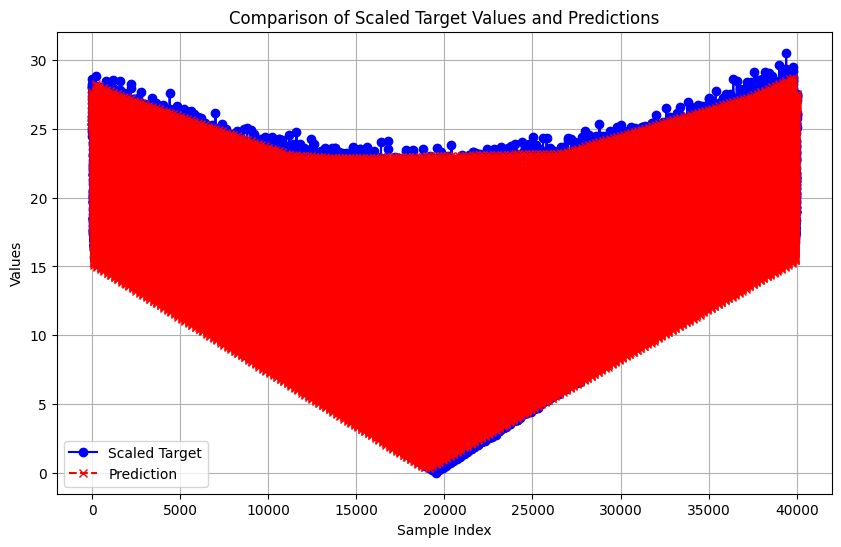

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['f_values_target_sqrt'], label='Scaled Target', marker='o', linestyle='-', color='blue')
plt.plot(y_pred, label='Prediction', marker='x', linestyle='--', color='red')
plt.title('Comparison of Scaled Target Values and Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()